In [40]:
import numpy as np


from sklearn.utils import check_X_y
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import LabelEncoder


def check_number_of_labels(n_labels, n_samples):
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 "
"to n_samples - 1 (inclusive)" % n_labels)
        
def davies_bouldin_index(X, labels):
    """Compute the Davies Bouldin index.
    The index is defined as the ratio of within-cluster
    and between-cluster distances.
    Parameters
    ----------
    X : array-like, shape (``n_samples``, ``n_features``)
        List of ``n_features``-dimensional data points. Each row corresponds
        to a single data point.
    labels : array-like, shape (``n_samples``,)
        Predicted labels for each sample.
    Returns
    -------
    score : float
        The resulting Davies-Bouldin index.
    References
    ----------
    .. [1] `Davies, David L.; Bouldin, Donald W. (1979).
       "A Cluster Separation Measure". IEEE Transactions on
       Pattern Analysis and Machine Intelligence. PAMI-1 (2): 224-227`_
    """

    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)

    check_number_of_labels(n_labels, n_samples)
    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, len(X[0])), np.float32)
    for k in range(n_labels):
        cluster_k = X[labels == k]
        mean_k = np.mean(cluster_k, axis=0)
        centroids[k] = mean_k
        intra_dists[k] = np.average(pairwise_distances(cluster_k, [mean_k]))
    centroid_distances = pairwise_distances(centroids)
    with np.errstate(divide='ignore', invalid='ignore'):
        if np.all((intra_dists[:, None] + intra_dists) == 0.0) or \
           np.all(centroid_distances == 0.0):
            return 0.0
        scores = (intra_dists[:, None] + intra_dists)/centroid_distances
        # remove inf values
        scores[scores == np.inf] = np.nan
    return np.mean(np.nanmax(scores, axis=1))



(150, 3)
silhouette 0.560842395802458
davies_boulding 0.5815459085548751
silhouette 0.5411966320908287
davies_boulding 0.577646965091688
silhouette 0.47279716410303263
davies_boulding 0.6444203649989431


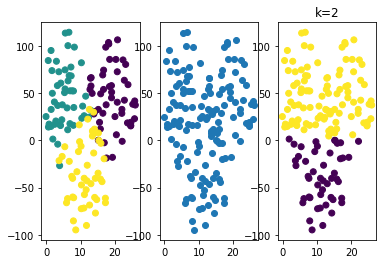

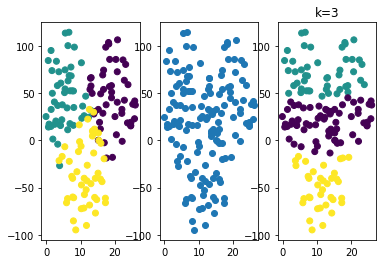

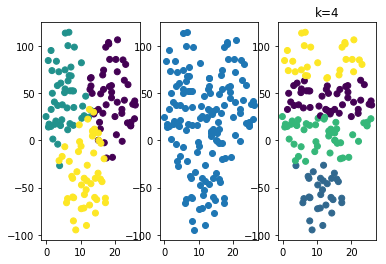

In [54]:
import numpy as np
import matplotlib.pyplot as plt

n=50 # samples per center
centers= [ [11,6], [-3,7], [3,-2], ] # centers
#centers= [ [10,5], [-2,4], [11,20], [15,-34], ]
dataset=np.zeros((0,3))
sigma=12

theta=45
rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])

for i in range(len(centers)):
    correlation=np.random.rand()
    center=centers[i]
    cluster=np.random.rand(n,len(center))*sigma
    cluster=cluster.dot(rotMatrix)
    cluster+=center
    if i==1:
        cluster=cluster
    label=np.zeros((n,1))+i
    cluster=np.hstack([cluster,label])
    dataset=np.vstack([dataset,cluster])
print(dataset.shape)

dataset[:,1]*=10

plt.show()
filename="2d_scale2.csv"
np.savetxt(filename,dataset,delimiter=",",fmt=['%f','%f','%d'],header="x,y,cluster")
X=dataset[:,0:2]

from sklearn.cluster import KMeans
import sklearn.metrics as metrics
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    predicted_clusters=kmeans.predict(X)


    f,(a1,a2,a3)=plt.subplots(1,3)
    a1.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
    a2.scatter(dataset[:,0],dataset[:,1])
    a3.scatter(dataset[:,0],dataset[:,1],c=predicted_clusters)
    plt.title("k=%d"% k)

    silhouette=metrics.silhouette_samples(X, predicted_clusters, metric='euclidean')
    davies_boulding=davies_bouldin_index(X, predicted_clusters)
    print('silhouette',silhouette.mean())
    print('davies_boulding',davies_boulding.mean())
